### 1. Load the required libraries

In [1]:
library(tidyverse) # includes dplyr, readr and ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 2. Load the dataset. First 2 rows are just comments.

In [ ]:
guinea_pig_tooth_growth <- read_csv(
  file = "tooth_growth_guinea_pigs.csv",
  skip = 2
)

Rows: 60 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cell_length, delivery_method

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


***-> R tells us through the console that the 2 columns imported as type \<chr>.\
We want them to be \<dbl> and \<fct>, so let"s cast them.***

### 3. Clean the data

In [4]:
guinea_pig_tooth_growth_format <- data.frame(
  cell_length = as.numeric(guinea_pig_tooth_growth$cell_length),
  delivery_method = factor(guinea_pig_tooth_growth$delivery_method)
)

Warning message in data.frame(cell_length = as.numeric(guinea_pig_tooth_growth$cell_length), :
“NAs introduced by coercion”


***-> We see a warning about NAs introduced by coercion. Examining the data we\
noticed the "N/A" string was converted to "NA" "numeric" value. We should\
have handled this explicitly but we leave it like this because the conversion\
guess was correct.***

In [5]:
summary(guinea_pig_tooth_growth_format, n = 3)

  cell_length          delivery_method
 Min.   :  4.20   ascorbic_acid:29    
 1st Qu.: 14.05   Ascorbic_acid: 1    
 Median : 19.70   orange_juice :29    
 Mean   : 20.29   orange_juicE : 1    
 3rd Qu.: 25.50                       
 Max.   :100.00                       
 NA's   :1                            

***-> We noticed different factors are assigned because caps misuse. Let"s correct\
it casting all delivery_method values to lowercase.***

In [6]:
guinea_pig_tooth_growth_format <-
  data.frame(
             cell_length = as.numeric(guinea_pig_tooth_growth$cell_length),
             delivery_method = factor(
                tolower(guinea_pig_tooth_growth$delivery_method)))

summary(guinea_pig_tooth_growth_format, n = 3)

Warning message in data.frame(cell_length = as.numeric(guinea_pig_tooth_growth$cell_length), :
“NAs introduced by coercion”


  cell_length          delivery_method
 Min.   :  4.20   ascorbic_acid:30    
 1st Qu.: 14.05   orange_juice :30    
 Median : 19.70                       
 Mean   : 20.29                       
 3rd Qu.: 25.50                       
 Max.   :100.00                       
 NA's   :1                            

### 4. Plot the data in a boxplot with the data points, colour and format axis.

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


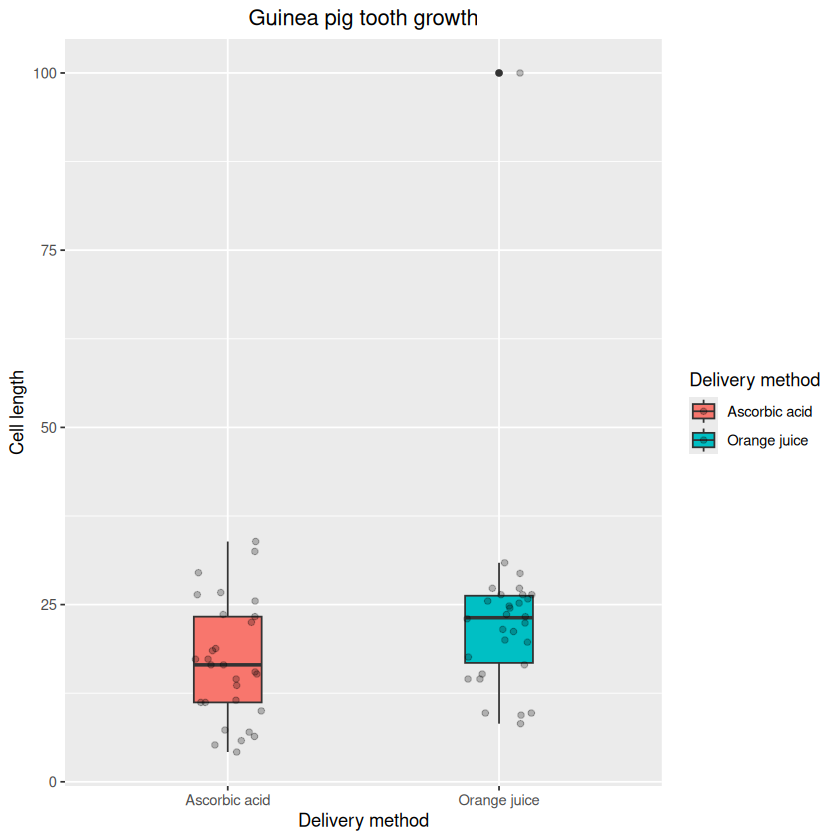

In [ ]:
guinea_pig_tooth_growth_format |>
  ggplot(aes(x = delivery_method, y = cell_length, fill = delivery_method)) +
  geom_boxplot(width = 0.25) +
  geom_jitter(height = 0, width = 0.125, alpha = 0.25) +
  scale_fill_discrete(
    "Delivery method", labels = c("Ascorbic acid",  "Orange juice")) +
  scale_x_discrete(labels = c("Ascorbic acid",  "Orange juice")) +
  labs (x = "Delivery method", y = "Cell length") +
  ggtitle("Guinea pig tooth growth") +
  theme(plot.title = element_text(hjust = 0.5))

***-> We can observe two warnings about values outside of the scale range. This are\
"outliers" (probably a typo) "messing" the graph and  making it hard to\
visualize the bars, so let"s ignore them for the plot.***

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


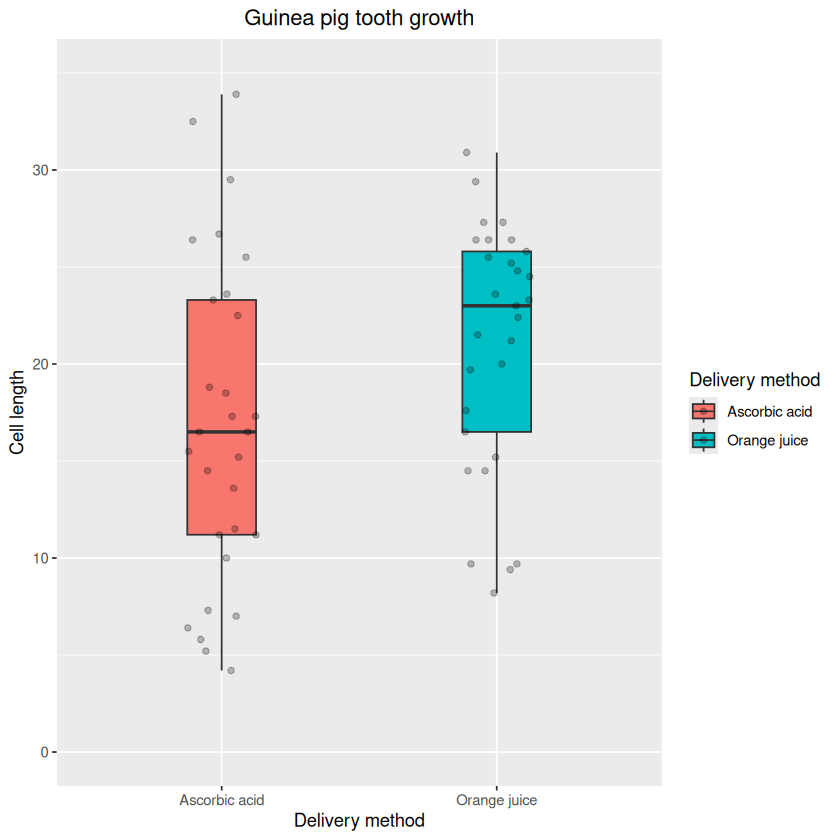

In [ ]:
guinea_pig_tooth_growth_format |>
  ggplot(aes(x = delivery_method, y = cell_length, fill = delivery_method)) +
  scale_y_continuous(limits=c(0,35)) +
  geom_boxplot(width = 0.25) +
  geom_jitter(height = 0, width = 0.125, alpha = 0.25) +
  scale_fill_discrete(
    "Delivery method", labels = c("Ascorbic acid",  "Orange juice")) +
  scale_x_discrete(labels = c("Ascorbic acid",  "Orange juice")) +
  labs (x = "Delivery method", y = "Cell length") +
  ggtitle("Guinea pig tooth growth") +
  theme(plot.title = element_text(hjust = 0.5))

### 5. Save the image

In [12]:
ggsave(filename = "guinea_pig_tooth_growth.png",
       width = 120,
       height = 120,
       units = "mm")

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


### 8. Make a summary table with Mean, SD, SE and n.

In [25]:
guinea_pig_tooth_growth_summary  <- guinea_pig_tooth_growth_format |>
  filter(cell_length < 90) |>
  group_by(delivery_method) |>
  summarise(
    n = n(),
    mean_cell_length = mean(cell_length),
    sd_cell_length = sd(cell_length),
    se_cell_length = sd_cell_length / sqrt(n),
    .groups = "drop")
guinea_pig_tooth_growth_summary

delivery_method,n,mean_cell_length,sd_cell_length,se_cell_length
<fct>,<int>,<dbl>,<dbl>,<dbl>
ascorbic_acid,29,16.80690,8.367024,1.553717
orange_juice,29,21.03103,6.402405,1.188897


### 9. Statistical test summary
A t-test could be appropiate to compare the mean of two groups of t-test is\
based on the assumption of homocedasticity and normality, let"s check those.

##### Homocedasticity with F-distribution

In [14]:
var.test(cell_length ~ delivery_method, data = guinea_pig_tooth_growth_format)


	F test to compare two variances

data:  cell_length by delivery_method
F = 0.28292, num df = 28, denom df = 29, p-value = 0.001255
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1340693 0.5999907
sample estimates:
ratio of variances 
         0.2829173 


***-> F-test show that the variance is not equal in the two groups.***

##### Shaphiro test for normality

In [15]:
guinea_pig_tooth_growth_format |>
  filter(cell_length < 90) |>
  group_by(delivery_method) |>
  summarise(shaphiro_test= shapiro.test(cell_length)$p.value)

delivery_method,shaphiro_test
<fct>,<dbl>
ascorbic_acid,0.32909272
orange_juice,0.03325364


***-> "orange_juice" group values (even excluding the "outlier") seem to not be\
normally distributed***

***-> They are not homocedastic and one group is not normal. We could use a\
Mann-Whitney U test but because we have n = 30, by the Central Limit Theorem,\
t-test is quite resistant when the two groups have the same size. Furthermore,\
a t-test variant (Welch approximation) would be even more appropiate, it can\
be applied with "t.test(... var.equal = FALSE)".***

In [16]:
t.test(
  formula = cell_length ~ delivery_method,
  data = guinea_pig_tooth_growth_format,
  var.equal = FALSE
)


	Welch Two Sample t-test

data:  cell_length by delivery_method
t = -2.0998, df = 44.51, p-value = 0.04145
alternative hypothesis: true difference in means between group ascorbic_acid and group orange_juice is not equal to 0
95 percent confidence interval:
 -13.4351154  -0.2777581
sample estimates:
mean in group ascorbic_acid  mean in group orange_juice 
                   16.80690                    23.66333 


***-> p-value of Welch aproximation is ~0.04 so let"s check Mann-Whitney U test***

In [17]:
wilcox.test(
  cell_length ~ delivery_method,
  data = guinea_pig_tooth_growth_format,
  exact = FALSE
)


	Wilcoxon rank sum test with continuity correction

data:  cell_length by delivery_method
W = 288.5, p-value = 0.0268
alternative hypothesis: true location shift is not equal to 0


***-> p-value is ~0.027 so we can say, with a confidence level of 95%, that both\
groups does not have the same mean. So cell_length of guinea pigs treated with\
vitamin C through ascorbic_acid is different from the ones treated with it\
through orange_juice.***